In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Read Data

In [5]:
df=pd.read_csv('352820 Historical Data.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (882, 6)


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-13,"194,300","201,000","200,500","194,000",317.63K,-3.09%
2024-05-10,"200,500","199,800","202,500","196,700",245.05K,0.30%
2024-05-09,"199,900","202,500","203,000","199,700",291.61K,-1.53%
2024-05-08,"203,000","204,500","205,500","202,500",197.43K,-0.73%
2024-05-07,"204,500","204,000","204,500","201,000",268.20K,0.49%


In [10]:
df['Open'] = df['Open'].str.replace(',', '')
df['Open'] = pd.to_numeric(df['Open'])

In [37]:
df.index = df.index.sort_values(ascending=True)

In [38]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-10-16,"194,300",201000,"200,500","194,000",317.63K,-3.09%
2020-10-19,"200,500",199800,"202,500","196,700",245.05K,0.30%
2020-10-20,"199,900",202500,"203,000","199,700",291.61K,-1.53%
2020-10-21,"203,000",204500,"205,500","202,500",197.43K,-0.73%
2020-10-22,"204,500",204000,"204,500","201,000",268.20K,0.49%


In [47]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-07,"178,200",174735,"183,150","173,745",1.17M,0.56%
2024-05-08,"177,210",178695,"183,645","175,230",1.62M,-1.92%
2024-05-09,"180,675",188100,"191,565","174,240",1.77M,-3.44%
2024-05-10,"187,110",196515,"200,475","185,130",1.97M,-5.74%
2024-05-13,"198,495",250470,"250,470","197,010",4.44M,-22.29%


# Plot Your Data

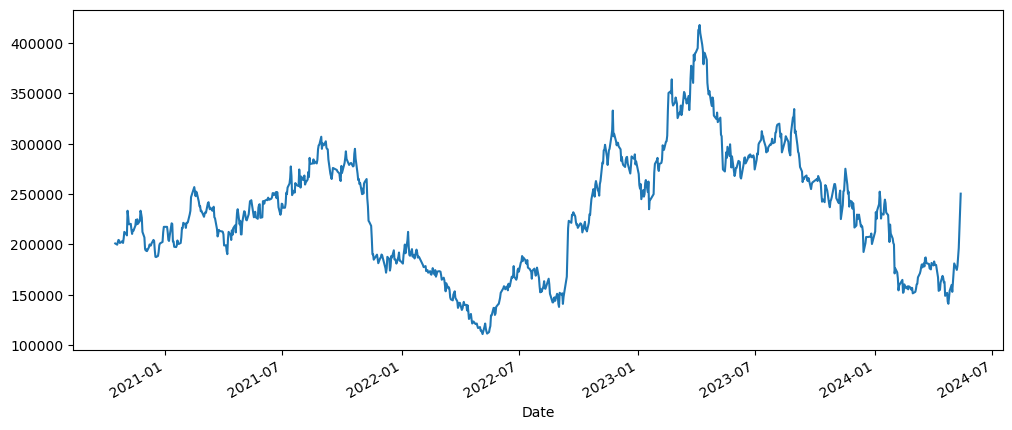

In [39]:
df['Open'].plot(figsize=(12,5))
plt.show()

# Check For Stationarity

In [40]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
    
  print(f"\n{dftest[1] > 0.05}")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [41]:
adf_test(df['Open'])

1. ADF :  -1.9307772769663167
2. P-Value :  0.3177238643773448
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 881
5. Critical Values :

True
	 1% :  -3.4377943310889303
	 5% :  -2.8648262173548456
	 10% :  -2.5685198165973295


# Figure Out Order for ARIMA Model

In [42]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
stepwise_fit = auto_arima(df['Open'], 
                          suppress_warnings=True,
                         trace=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18270.603, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18272.516, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18272.525, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18268.651, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18274.355, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.753 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  882
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9133.325
Date:                Mon, 03 Jun 2024   AIC                          18268.651
Time:                        02:06:20   BIC                          18273.432
Sample:                             0   HQIC                         18270.479
                                - 882                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.911e+07   1.68e+06     35.270      0.000    5.58e+07    6.24e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               495.25
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima_model import ARIMA

# Split Data into Training and Testing

In [45]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(882, 6)
(852, 6) (30, 6)
Price       174,240
Open         175230
High        179,685
Low         173,250
Vol.        343.49K
Change %      1.15%
Name: 2024-03-28 00:00:00, dtype: object Price       198,495
Open         250470
High        250,470
Low         197,010
Vol.          4.44M
Change %    -22.29%
Name: 2024-05-13 00:00:00, dtype: object


## Train the Model

In [54]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Open'],order=(0,1,0))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  852
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -8798.313
Date:                Mon, 03 Jun 2024   AIC                          17598.625
Time:                        02:09:05   BIC                          17603.371
Sample:                             0   HQIC                         17600.443
                                - 852                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.587e+07   2.07e+06     26.977      0.000    5.18e+07    5.99e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                71.64
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Set

<Axes: xlabel='Date'>

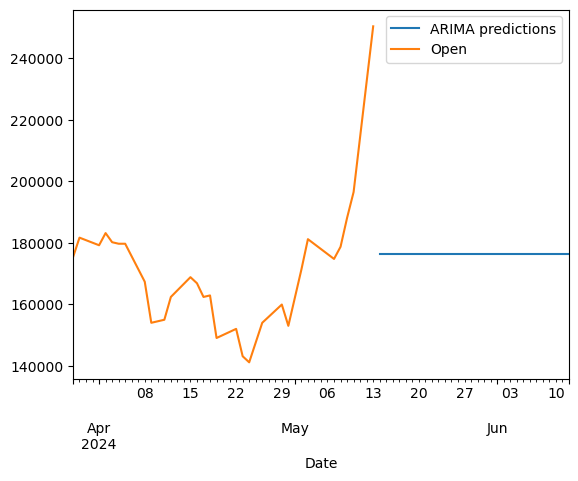

In [55]:
start=len(train)
end=len(train)+len(test)-1

#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2024-05-14',end='2024-06-12')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

pred.index=index_future_dates
pred.plot(legend=True)
test['Open'].plot(legend=True)

<Axes: xlabel='Date'>

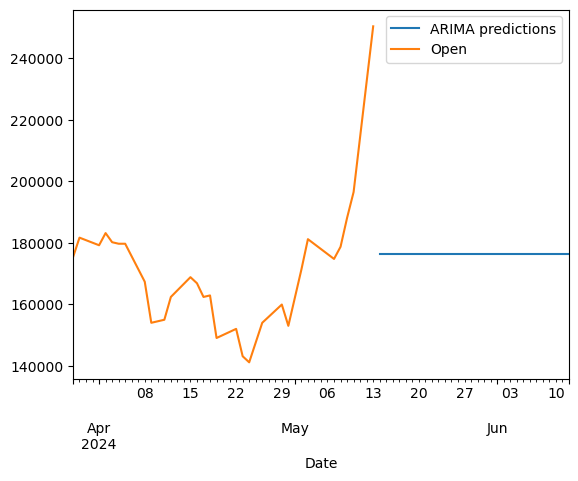

In [56]:
pred.plot(legend='ARIMA Predictions')
test['Open'].plot(legend=True)

In [57]:
test['Open'].mean()

169950.0

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Open']))
print(rmse)


21431.08011743692


In [59]:
model2=ARIMA(df['Open'],order=(1,0,1))
model2=model2.fit()
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-07,"178,200",174735,"183,150","173,745",1.17M,0.56%
2024-05-08,"177,210",178695,"183,645","175,230",1.62M,-1.92%
2024-05-09,"180,675",188100,"191,565","174,240",1.77M,-3.44%
2024-05-10,"187,110",196515,"200,475","185,130",1.97M,-5.74%
2024-05-13,"198,495",250470,"250,470","197,010",4.44M,-22.29%


# For Future Dates

In [61]:
index_future_dates=pd.date_range(start='2024-05-14',end='2024-06-13')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2024-05-14    251480.260511
2024-05-15    251288.492343
2024-05-16    251098.539159
2024-05-17    250910.383780
2024-05-18    250724.009193
2024-05-19    250539.398542
2024-05-20    250356.535133
2024-05-21    250175.402428
2024-05-22    249995.984049
2024-05-23    249818.263770
2024-05-24    249642.225518
2024-05-25    249467.853375
2024-05-26    249295.131572
2024-05-27    249124.044489
2024-05-28    248954.576654
2024-05-29    248786.712743
2024-05-30    248620.437574
2024-05-31    248455.736112
2024-06-01    248292.593461
2024-06-02    248130.994869
2024-06-03    247970.925722
2024-06-04    247812.371544
2024-06-05    247655.317997
2024-06-06    247499.750879
2024-06-07    247345.656121
2024-06-08    247193.019788
2024-06-09    247041.828077
2024-06-10    246892.067315
2024-06-11    246743.723960
2024-06-12    246596.784595
2024-06-13    246451.235934
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

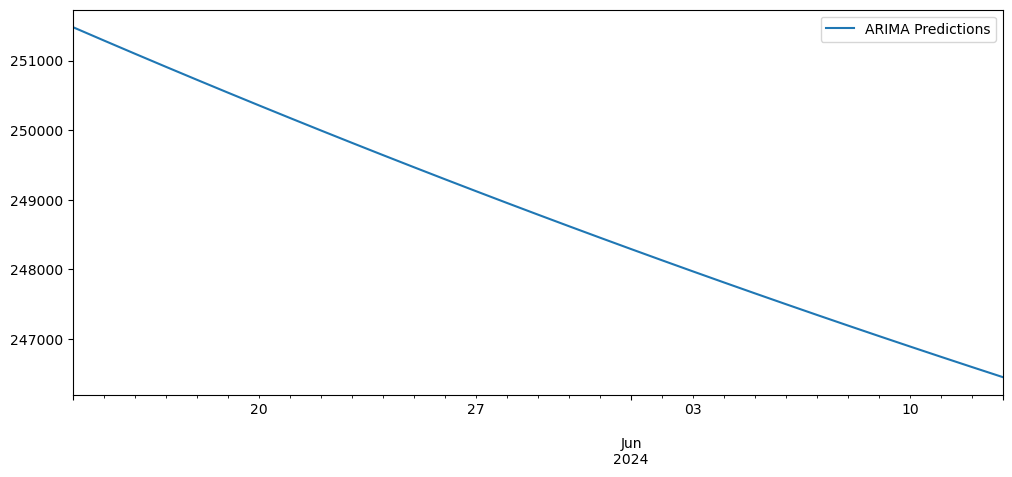

In [62]:
pred.plot(figsize=(12,5),legend=True)